root
 |-- Mois: string (nullable = true)
 |-- UIC: string (nullable = true)
 |-- Nom gare: string (nullable = true)
 |-- Nombre de non-conformités: string (nullable = true)
 |-- Nombre d'observations: string (nullable = true)
 |-- Taux de conformité: string (nullable = true)

root
 |-- Mois: string (nullable = true)
 |-- Nombre d'observations: integer (nullable = true)

<class 'pyspark.sql.dataframe.DataFrame'>
[('2017-01', 58822), ('2017-02', 58213), ('2017-03', 59736), ('2017-04', 58564), ('2017-05', 58782), ('2017-06', 57710), ('2017-07', 57182), ('2017-08', 58553), ('2017-09', 57761), ('2017-10', 58269), ('2017-11', 58631), ('2017-12', 57649), ('2018-01', 61677), ('2018-02', 59028), ('2018-03', 61659), ('2018-04', 60764), ('2018-05', 61173), ('2018-06', 59580), ('2018-07', 61479), ('2018-08', 59388), ('2018-09', 60842), ('2018-10', 61571), ('2018-11', 60737), ('2018-12', 59365), ('2019-01', 60701), ('2019-02', 59445), ('2019-03', 62961), ('2019-04', 61414), ('2019-05', 60427), ('20

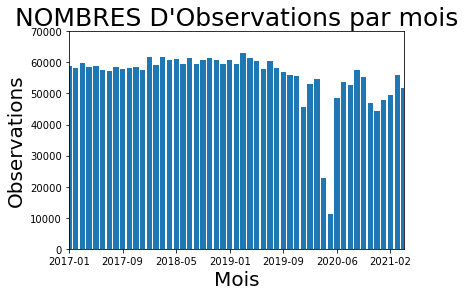

In [56]:
import pyspark
import csv
import sys  
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import numpy as np

spark = SparkSession.builder.appName("Python").getOrCreate()

#spark = SparkSession.builder.master("put hdfs adress here").appName("Python").getOrCreate()



df = spark.read.format("csv").option("header", True).option("delimiter",";").load('proprete-en-gare.csv')
df.printSchema()

df2 = df.select(col("Mois"),col("Nombre d'observations").astype(IntegerType()))
df2.printSchema()

#df2.groupBy("JOUR","LIBELLE_ARRET").sum("NB_VALD").show(10,vertical=True)
df3 = df2.groupBy("Mois").sum("Nombre d'observations").orderBy("Mois") #.show(10,vertical=True)
#df3.show()
print(type(df3))

mach = df3.select(col('Mois'), col("sum(Nombre d'observations)")).rdd.map(lambda x: (x[0], x[1])).collect()

print(mach)

#plt.scatter(*zip(*mach))
#plt.show()
plt.bar(*zip(*mach))
plt.title("NOMBRES D'Observations par mois", fontsize=25)
plt.xlabel('Mois', fontsize=20)
plt.ylabel('Observations', fontsize=20)
plt.xlim([0,50])
plt.ylim([0,70000])
plt.xticks(np.arange(0, 50, 8))
plt.yticks(np.arange(0, 80000, 10000))

plt.show()
